In [1]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

In [3]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# file_path = "C:/Users/Amith Nandivada/Desktop/Amith/MS/CUB/Boulder Course Material/Fall23/Machine Learning/Assignment/Exam/exam_data.csv"
file_path = "/content/exam_data.csv"

amazon_data_df = pd.read_csv(file_path)
print(amazon_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Credit_Card_Approval        65 non-null     object
 1   Previous_Items_Purchased    65 non-null     object
 2   Credit_History              65 non-null     object
 3   Spending_History_on_Amazon  65 non-null     int64 
 4   Annual_Income               65 non-null     int64 
 5   Credit_Inquiries            65 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.2+ KB
None


In [6]:
amazon_data_df.head(10)

,Credit_Card_Approval,Previous_Items_Purchased,Credit_History,Spending_History_on_Amazon,Annual_Income,Credit_Inquiries
0,Yes,"Phone, Laptop, Cooker",Good,500,75000,2
1,No,"Clothes, Makeup",Fair,300,45000,1
2,Yes,Books,Excellent,700,100000,0
3,Yes,"Smartwatch, Camera, Shoes",Good,600,85000,3
4,No,"Furniture, Books",Poor,150,60000,1
5,No,"Jewelry, Skincare, Headphones",Fair,400,50000,2
6,Yes,"Books, Clothing, Tablet",Excellent,900,120000,1
7,Yes,"Laptop, Cookware",Good,800,90000,4
8,No,"Perfume, Handbags, Books",Fair,200,40000,2
9,Yes,"Appliances, Smartphone",Good,750,110000,0


In [7]:
amazon_data_df["Credit_Card_Approval"].isna().sum()

0

## Drop Categorical Column Previous Items Purchased

In [8]:
amazon_data_df = amazon_data_df.drop('Previous_Items_Purchased', axis=1)
amazon_data_df.head(10)

,Credit_Card_Approval,Credit_History,Spending_History_on_Amazon,Annual_Income,Credit_Inquiries
0,Yes,Good,500,75000,2
1,No,Fair,300,45000,1
2,Yes,Excellent,700,100000,0
3,Yes,Good,600,85000,3
4,No,Poor,150,60000,1
5,No,Fair,400,50000,2
6,Yes,Excellent,900,120000,1
7,Yes,Good,800,90000,4
8,No,Fair,200,40000,2
9,Yes,Good,750,110000,0


## Convert Categorical Column - Credit History to Numeric

In [9]:
amazon_data_df['Credit_Card_Approval_numeric'] = amazon_data_df['Credit_Card_Approval'].map({'Yes': 1, 'No': 0})

encoder = ce.TargetEncoder(cols=['Credit_History'])
amazon_data_df = encoder.fit_transform(amazon_data_df, amazon_data_df['Credit_Card_Approval_numeric'])

amazon_data_df.head(10)

,Credit_Card_Approval,Credit_History,Spending_History_on_Amazon,Annual_Income,Credit_Inquiries,Credit_Card_Approval_numeric
0,Yes,0.866409,500,75000,2,1
1,No,0.431752,300,45000,1,0
2,Yes,0.796736,700,100000,0,1
3,Yes,0.866409,600,85000,3,1
4,No,0.472376,150,60000,1,0
5,No,0.431752,400,50000,2,0
6,Yes,0.796736,900,120000,1,1
7,Yes,0.866409,800,90000,4,1
8,No,0.431752,200,40000,2,0
9,Yes,0.866409,750,110000,0,1


In [10]:
amazon_data_df.drop("Credit_Card_Approval", axis=1, inplace=True)
amazon_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Credit_History                65 non-null     float64
 1   Spending_History_on_Amazon    65 non-null     int64  
 2   Annual_Income                 65 non-null     int64  
 3   Credit_Inquiries              65 non-null     int64  
 4   Credit_Card_Approval_numeric  65 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 2.7 KB


## Now we have all numeric columns. Let's Normalize our data.

In [11]:
scaler = MinMaxScaler()

amazon_data_df_normalized = scaler.fit_transform(amazon_data_df)
amazon_data_df_normalized = pd.DataFrame(amazon_data_df_normalized, columns=amazon_data_df.columns)

amazon_data_df_normalized.describe(include='all')

,Credit_History,Spending_History_on_Amazon,Annual_Income,Credit_Inquiries,Credit_Card_Approval_numeric
count,65.000000,65.000000,65.000000,65.000000,65.000000
mean,0.618610,0.433407,0.426000,0.384615,0.646154
std,0.436608,0.295761,0.294882,0.261743,0.481883
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093463,0.142857,0.120000,0.250000,0.000000
50%,0.839706,0.428571,0.480000,0.250000,1.000000
75%,1.000000,0.714286,0.650000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
amazon_data_df_normalized.head(5)

,Credit_History,Spending_History_on_Amazon,Annual_Income,Credit_Inquiries,Credit_Card_Approval_numeric
0,1.000000,0.333333,0.35,0.50,1.0
1,0.000000,0.142857,0.05,0.25,0.0
2,0.839706,0.523810,0.60,0.00,1.0
3,1.000000,0.428571,0.45,0.75,1.0
4,0.093463,0.000000,0.20,0.25,0.0


In [13]:
amazon_data_df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Credit_History                65 non-null     float64
 1   Spending_History_on_Amazon    65 non-null     float64
 2   Annual_Income                 65 non-null     float64
 3   Credit_Inquiries              65 non-null     float64
 4   Credit_Card_Approval_numeric  65 non-null     float64
dtypes: float64(5)
memory usage: 2.7 KB


In [14]:
amazon_data_df_normalized['Credit_Card_Approval'] = amazon_data_df_normalized['Credit_Card_Approval_numeric'].map({1: 'Yes', 0: 'No'})
amazon_data_df_normalized.head(10)

,Credit_History,Spending_History_on_Amazon,Annual_Income,Credit_Inquiries,Credit_Card_Approval_numeric,Credit_Card_Approval
0,1.000000,0.333333,0.35,0.50,1.0,Yes
1,0.000000,0.142857,0.05,0.25,0.0,No
2,0.839706,0.523810,0.60,0.00,1.0,Yes
3,1.000000,0.428571,0.45,0.75,1.0,Yes
4,0.093463,0.000000,0.20,0.25,0.0,No
5,0.000000,0.238095,0.10,0.50,0.0,No
6,0.839706,0.714286,0.80,0.25,1.0,Yes
7,1.000000,0.619048,0.50,1.00,1.0,Yes
8,0.000000,0.047619,0.00,0.50,0.0,No
9,1.000000,0.571429,0.70,0.00,1.0,Yes


## Decision Trees

In [15]:
y = amazon_data_df_normalized["Credit_Card_Approval"]
X = amazon_data_df_normalized.drop(['Credit_Card_Approval_numeric', 'Credit_Card_Approval'], axis = 1)

X.columns

Index(['Credit_History', 'Spending_History_on_Amazon', 'Annual_Income', 'Credit_Inquiries'], dtype='object')

In [16]:
y.isna().sum()

0

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
y_train.describe(include='all')

count      52
unique      2
top       Yes
freq       33
Name: Credit_Card_Approval, dtype: object

In [19]:
X_train.describe(include='all')

,Credit_History,Spending_History_on_Amazon,Annual_Income,Credit_Inquiries
count,52.000000,52.000000,52.000000,52.000000
mean,0.604553,0.431868,0.420769,0.389423
std,0.434990,0.306315,0.299312,0.268499
min,0.000000,0.000000,0.000000,0.000000
25%,0.093463,0.142857,0.115000,0.250000
50%,0.839706,0.428571,0.465000,0.375000
75%,1.000000,0.714286,0.627500,0.500000
max,1.000000,1.000000,1.000000,1.000000


In [20]:
y_test.describe(include='all')

count      13
unique      2
top       Yes
freq        9
Name: Credit_Card_Approval, dtype: object

In [21]:
X_test.describe(include='all')

,Credit_History,Spending_History_on_Amazon,Annual_Income,Credit_Inquiries
count,13.000000,13.000000,13.000000,13.000000
mean,0.674836,0.439560,0.446923,0.365385
std,0.456316,0.260207,0.287094,0.241854
min,0.000000,0.047619,0.050000,0.000000
25%,0.093463,0.238095,0.150000,0.250000
50%,1.000000,0.523810,0.520000,0.250000
75%,1.000000,0.619048,0.650000,0.500000
max,1.000000,0.809524,0.900000,0.750000


In [22]:
DT1 = DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                             splitter='best',  ## or "random" or "best"
                             max_depth=3,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=None,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             class_weight=None)

DT1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [23]:
feature_names = X_train.columns

In [24]:
class_names = y_train.unique()

[Text(0.5, 0.75, 'Credit_History <= 0.467\nentropy = 0.947\nsamples = 52\nvalue = [19, 33]\nclass = No'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = Yes'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33]\nclass = No')]

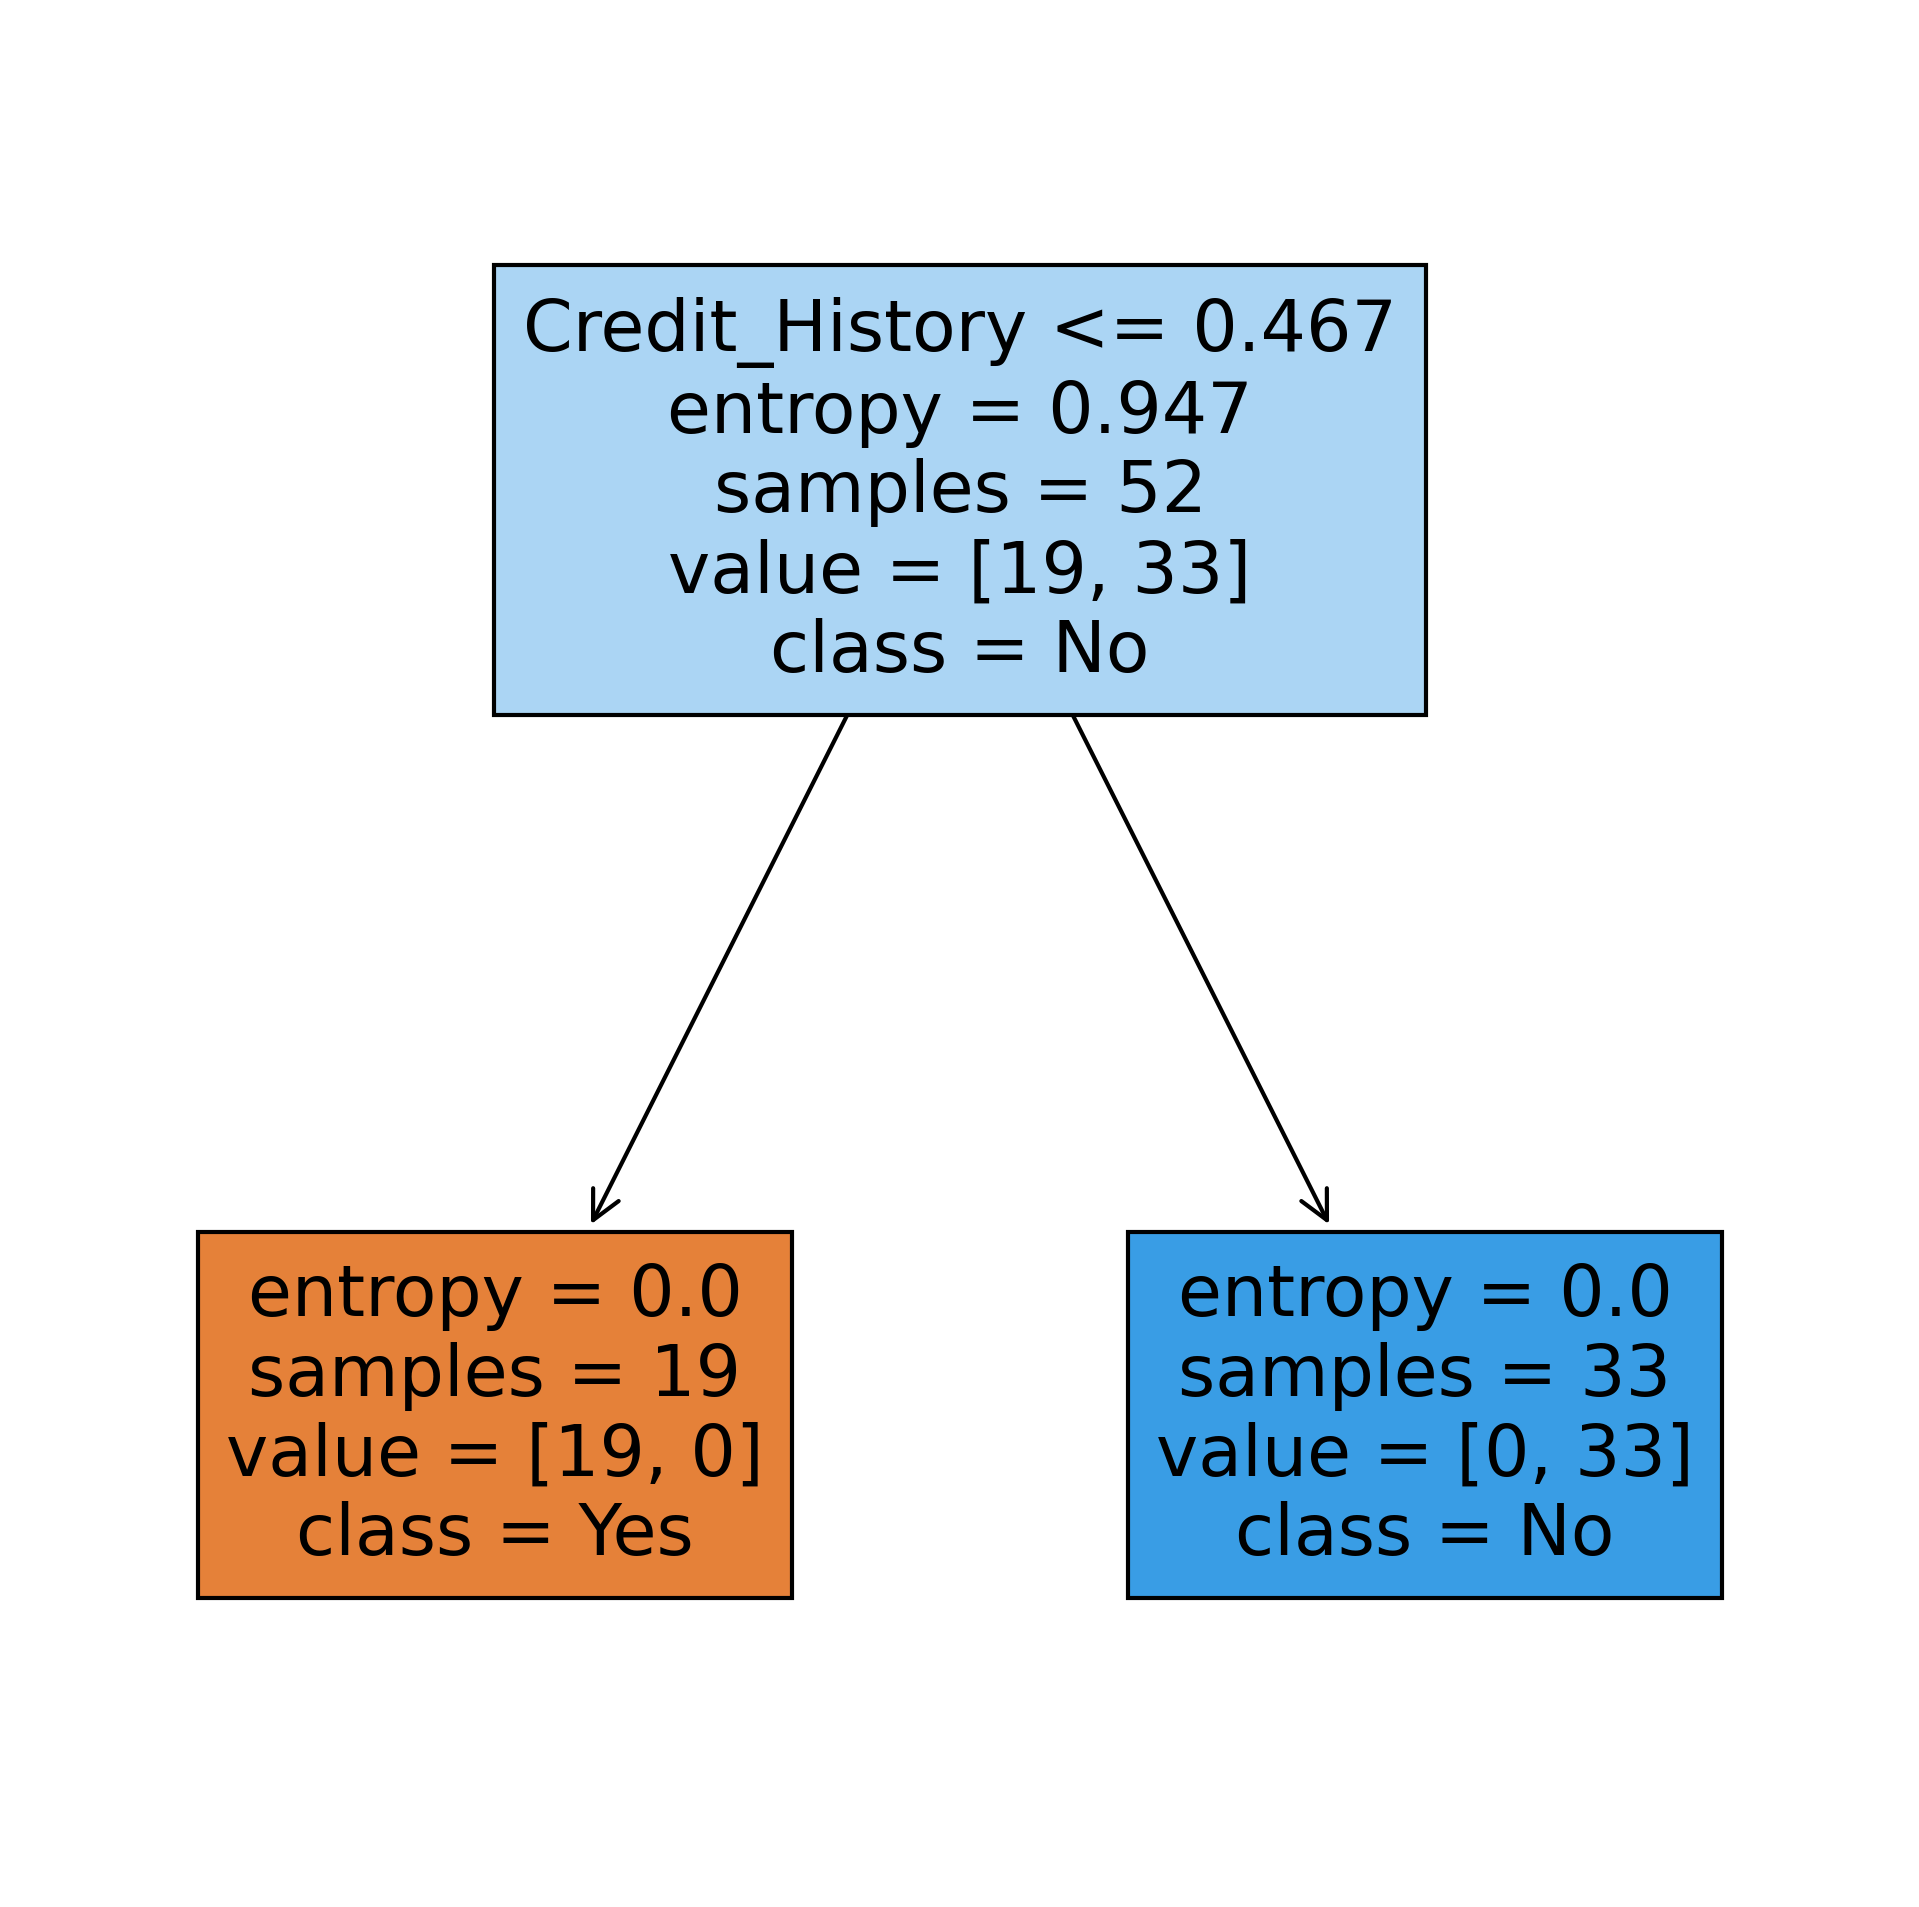

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), dpi=300)
plot_tree(DT1, filled=True, feature_names=feature_names, class_names=class_names, impurity=True, ax=axes)

In [26]:
# Use the classifier to make predictions on the testing data
y_pred = DT1.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4 0]
 [0 9]]


Accuracy of tree with entropy as criterion is: 1.0


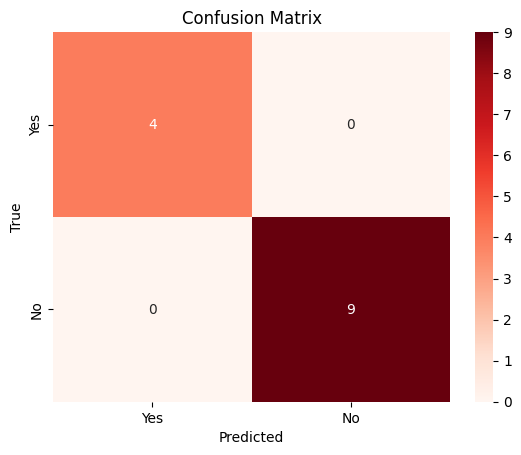

In [27]:
sns.heatmap(cm, annot=True, cmap='Reds', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of tree with entropy as criterion is: " + str(accuracy))

The Decision Tree classifier, trained on a normalized dataset with features such as 'Credit_History', 'Spending_History_on_Amazon', 'Annual_Income', and 'Credit_Inquiries', achieved perfect accuracy (100%) on the test set. The tree's visualization indicates a concise structure with a root node based on 'Credit_History,' successfully separating instances into pure leaves for 'Yes' and 'No' classes. While the high accuracy is promising, caution is advised as overfitting could be a concern, particularly with a small dataset. Further model evaluation, parameter tuning, or cross-validation is recommended to ensure the model's robustness beyond this specific dataset.

## In Layman Terms

We analyzed data about people's credit history, spending habits, income, etc., and used a decision-making model called a Decision Tree to predict whether someone would be approved for a credit card. Strikingly, our model achieved a perfect score when tested on new data, accurately predicting every approval or rejection. While this may suggest a strong model, achieving perfection raises concerns about potential overfitting, meaning the model might be too tailored to the training data and struggle with new, unseen data. Further validation and adjustments are recommended to ensure the model's reliability in practical scenarios beyond the current dataset.

## SVM

In [28]:
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
y_train.describe(include='all')

count      52
unique      2
top       Yes
freq       33
Name: Credit_Card_Approval, dtype: object

In [31]:
X_train.describe(include='all')

,Credit_History,Spending_History_on_Amazon,Annual_Income,Credit_Inquiries
count,52.000000,52.000000,52.000000,52.000000
mean,0.604553,0.431868,0.420769,0.389423
std,0.434990,0.306315,0.299312,0.268499
min,0.000000,0.000000,0.000000,0.000000
25%,0.093463,0.142857,0.115000,0.250000
50%,0.839706,0.428571,0.465000,0.375000
75%,1.000000,0.714286,0.627500,0.500000
max,1.000000,1.000000,1.000000,1.000000


In [32]:
y_test.describe(include='all')

count      13
unique      2
top       Yes
freq        9
Name: Credit_Card_Approval, dtype: object

In [33]:
X_test.describe(include='all')

,Credit_History,Spending_History_on_Amazon,Annual_Income,Credit_Inquiries
count,13.000000,13.000000,13.000000,13.000000
mean,0.674836,0.439560,0.446923,0.365385
std,0.456316,0.260207,0.287094,0.241854
min,0.000000,0.047619,0.050000,0.000000
25%,0.093463,0.238095,0.150000,0.250000
50%,1.000000,0.523810,0.520000,0.250000
75%,1.000000,0.619048,0.650000,0.500000
max,1.000000,0.809524,0.900000,0.750000


In [34]:
svm = SVC()

# Train the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_SVM = svm.predict(X_test)

# Print Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_SVM)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred_SVM)

print(accuracy)
print("\n")
print(cm_svm)

1.0


[[4 0]
 [0 9]]


In [35]:
class_names = y_train.unique()
print(class_names)

['Yes' 'No']


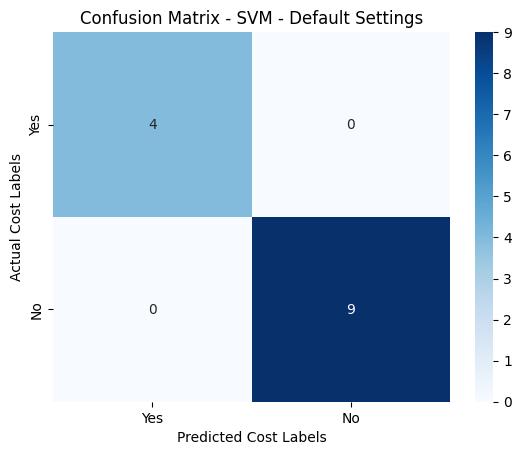

In [36]:
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVM - Default Settings")
plt.xlabel("Predicted Cost Labels")
plt.ylabel("Actual Cost Labels")
plt.show()

We employed a Support Vector Machine (SVM) classifier on our normalized dataset to predict credit card approvals. After training the model on the provided data, we tested its performance on a separate set. The confusion matrix reveals perfect predictions, yielding an accuracy score of 1.0. This implies that the SVM correctly classified all instances in the test set, distinguishing between "Yes" (approved) and "No" (not approved) categories with complete accuracy. The heatmap visualization of the confusion matrix visually confirms this flawless performance.

## In Layman Terms

In our attempt to predict credit card approvals, we used a different approach called Support Vector Machine (SVM). Interestingly, our SVM model, like the Decision Tree before, also got every prediction right when tested on new data. It's like acing a test – our model correctly guessed whether someone gets a credit card or not for every person in the test group. This is promising, but we should still be careful and make sure the model works just as well in situations beyond this particular dataset.

## Get transactional data from Previous_Items_Purchased column

In [37]:
# file_path = "C:/Users/Amith Nandivada/Desktop/Amith/MS/CUB/Boulder Course Material/Fall23/Machine Learning/Assignment/Exam/exam_data.csv"
file_path = "/content/exam_data.csv"

amazon_data_df = pd.read_csv(file_path)

In [38]:
previous_items_df = amazon_data_df['Previous_Items_Purchased']

# Split the values into separate columns
transactional_data_df = previous_items_df.str.split(', ', expand=True)

# Display the new DataFrame with split columns
print(transactional_data_df.head())

            0       1       2
0       Phone  Laptop  Cooker
1     Clothes  Makeup    None
2       Books    None    None
3  Smartwatch  Camera   Shoes
4   Furniture   Books    None


In [39]:
# write_data_path = "C:/Users/Amith Nandivada/Desktop/Amith/MS/CUB/Boulder Course Material/Fall23/Machine Learning/Assignment/Exam/transactional_exam_data.csv"
write_data_path = "/content/transactional_exam_data.csv"

transactional_data_df.to_csv(write_data_path, header=False, index=False)